# Classification on fashion_mnist dataset

In [2]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
# Or we can write like this
fashion_mnist = tf.keras.datasets.fashion_mnist
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## EDA

In [7]:
type(fashion_mnist)

module

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

In [13]:
print('Training Label:')
print(train_labels[0])
print('Training Image:')
print(train_images[0])

Training Label:
9
Training Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0 

In [14]:
np.max(train_images)

255

## Data Preprocessing

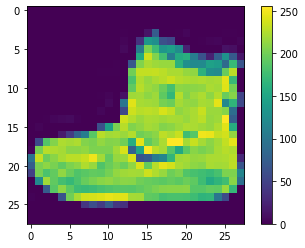

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

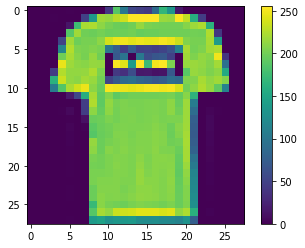

In [16]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

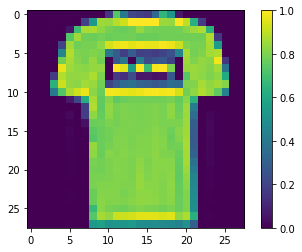

In [18]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

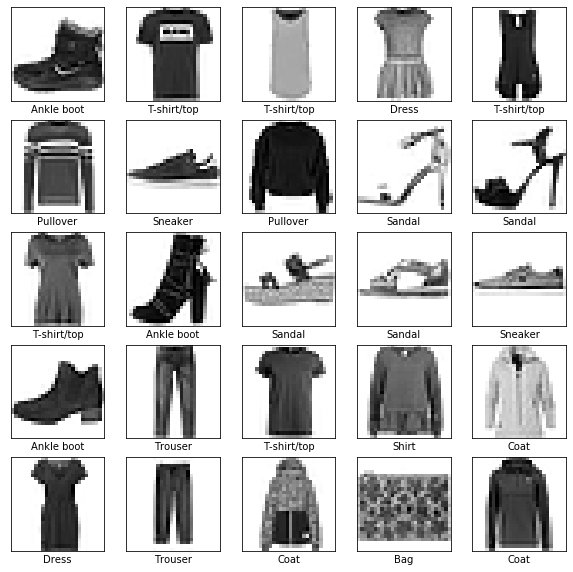

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [20]:
# Setting the layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 379us/sample - loss: 0.4982 - accuracy: 0.8260- loss: 0.5013 - accura
Epoch 2/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.3760 - accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.3374 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3124 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2976 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2792 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2690 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2569 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 11s 179us/sample - loss: 

In [23]:
# Evaluate the model with test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [24]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([2.0937507e-06, 1.3879086e-09, 6.1377712e-09, 7.1011119e-10,
       2.4454393e-06, 5.6640855e-03, 8.7035733e-07, 4.5604785e-03,
       5.6486673e-09, 9.8977005e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

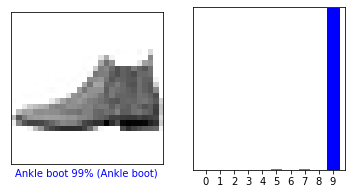

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

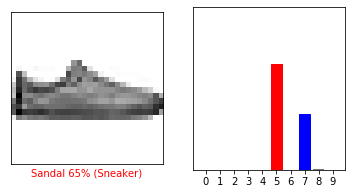

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

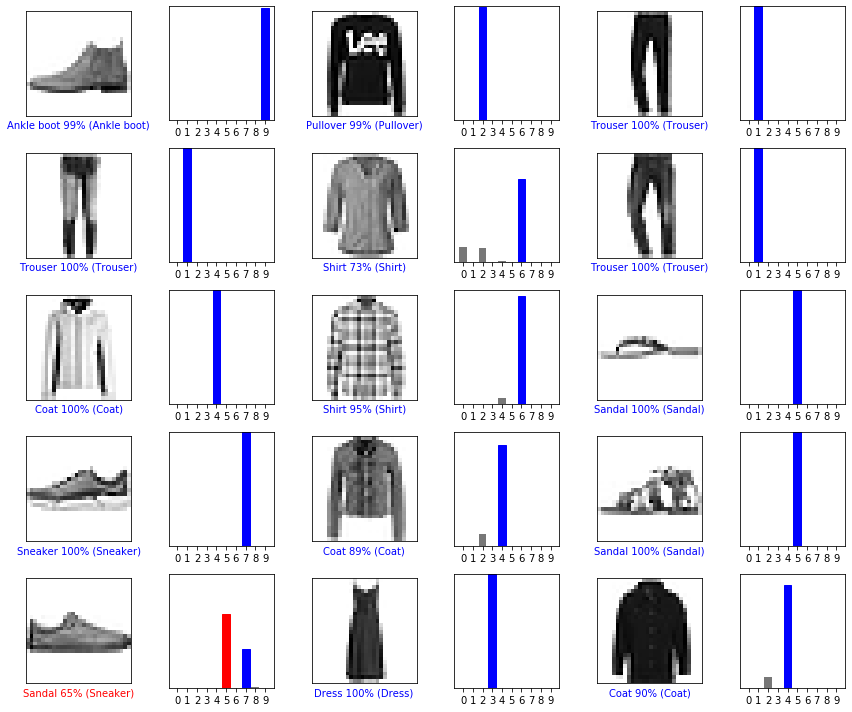

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [32]:
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.7716468e-06 4.5305780e-14 9.9277264e-01 2.7573126e-13 6.8236254e-03
  1.2550572e-10 4.0004417e-04 6.0523061e-16 1.6202830e-12 1.9455330e-13]]


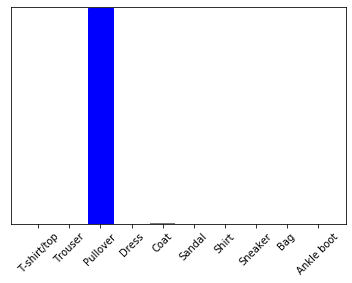

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

2

## Use of Callback

In [38]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 497us/sample - loss: 0.4752 - accuracy: 0.8303
Epoch 2/10
60000/60000 [==============================] - 22s 359us/sample - loss: 0.3572 - accuracy: 0.8688
Epoch 3/10
60000/60000 [==============================] - 19s 311us/sample - loss: 0.3218 - accuracy: 0.8802
Epoch 4/10
60000/60000 [==============================] - 20s 332us/sample - loss: 0.2980 - accuracy: 0.8896
Epoch 5/10
60000/60000 [==============================] - 18s 305us/sample - loss: 0.2781 - accuracy: 0.8974
Epoch 6/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9022
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 19s 311us/sample - loss: 0.2649 - accuracy: 0.9023


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


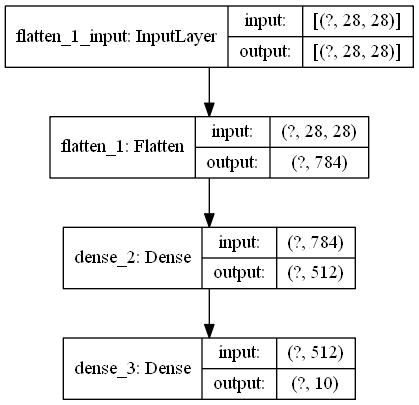

In [40]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

In [41]:
model.layers

In [42]:
hidden1 = model.layers[1]
hidden1.name

'dense_2'

In [44]:
model.get_layer(hidden1.name) is hidden1

True

In [45]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0281932 ,  0.0023009 ,  0.00887944, ...,  0.04358736,
        -0.02026291, -0.02486986],
       [ 0.03260612,  0.0382498 , -0.01653292, ..., -0.06262517,
         0.0296644 ,  0.05900969],
       [ 0.08211467, -0.23453379, -0.002873  , ..., -0.0153447 ,
        -0.00294115,  0.13451724],
       ...,
       [-0.00282911, -0.20802084,  0.01346157, ...,  0.07888954,
         0.0097675 ,  0.01681586],
       [ 0.01596835, -0.40810722,  0.06124805, ...,  0.04400665,
        -0.04534349, -0.0067256 ],
       [-0.03070066, -0.29464683,  0.04067255, ..., -0.04941351,
         0.04445273, -0.0386663 ]], dtype=float32)

In [46]:
weights.shape

(784, 512)

In [47]:
biases

array([ 3.29981446e-01, -1.28839538e-01, -2.21292563e-02,  2.37154260e-01,
        2.88760036e-01,  3.46029624e-02,  4.72116098e-02,  1.10664696e-01,
       -1.55466869e-01,  1.25323862e-01,  2.55370557e-01,  2.70696342e-01,
       -2.52094686e-01, -7.76268616e-02, -2.80214638e-01,  1.92685708e-01,
       -2.92709082e-01, -2.31685311e-01,  1.32642597e-01,  1.80357039e-01,
        3.82008940e-01,  1.23541299e-02,  1.05419926e-01, -1.37995794e-01,
       -9.72872367e-04,  1.75656736e-01, -1.03940219e-02, -1.30755663e-01,
        1.82887986e-01,  5.18727064e-01, -1.41988024e-02,  1.80681080e-01,
        5.26841581e-02,  3.49142283e-01, -1.26374569e-02,  2.18127117e-01,
       -1.73274025e-01,  7.25453645e-02,  1.97638541e-01,  4.34765741e-02,
       -1.34762703e-02,  2.77426809e-01,  7.86327273e-02,  2.43740529e-01,
       -8.73027518e-02,  1.43441185e-01,  1.73435539e-01,  3.08890909e-01,
       -2.71946285e-02,  3.84006530e-01,  8.11818242e-02,  2.32681990e-01,
        2.78491557e-01,  

In [48]:
biases.shape

(512,)

***